In [1]:
#This notebook is supposed to mainly do 3 tasks:
#1) Plotting the ETROC pre-amplifier signals from 3 samples (@ 3 different collected Q) on a csv file
#2) Reading the TB DESY systest data and generating one TOA vs TOT plot out of that
#3) Reading a txt file generated trough Weightfield6.0 and compare the signal shape stored there with the one obtained at the TB
#4) Reading a txt file generated trough Weightfield6.0 and compare the TOA vs TOT stored there with the one obtained at the TB

#IMPORTING libraries
import os
import sys
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib.pylab as plt
import matplotlib.axes as axes
import csv

import ROOT as root
from array import array

Welcome to JupyROOT 6.30/04


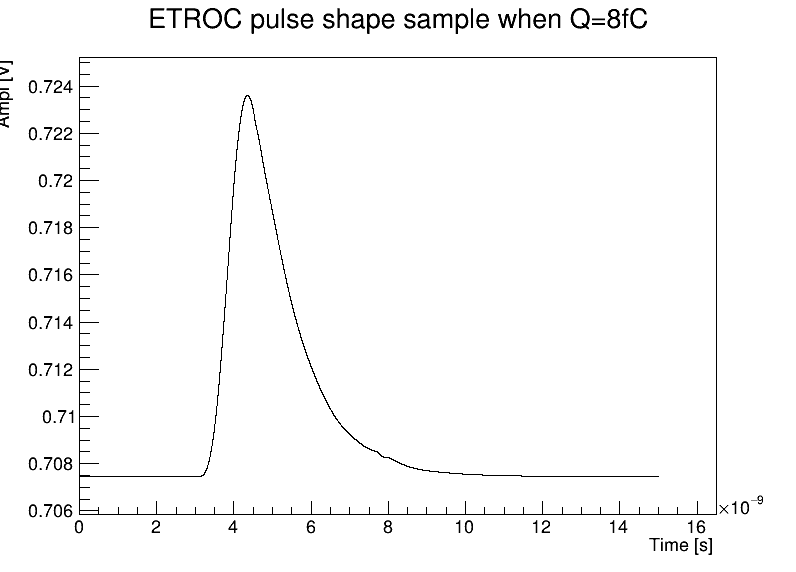

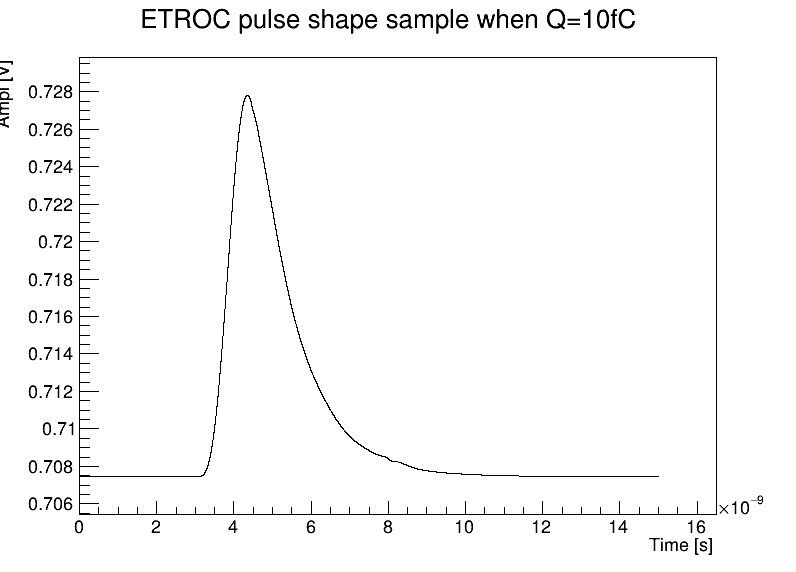

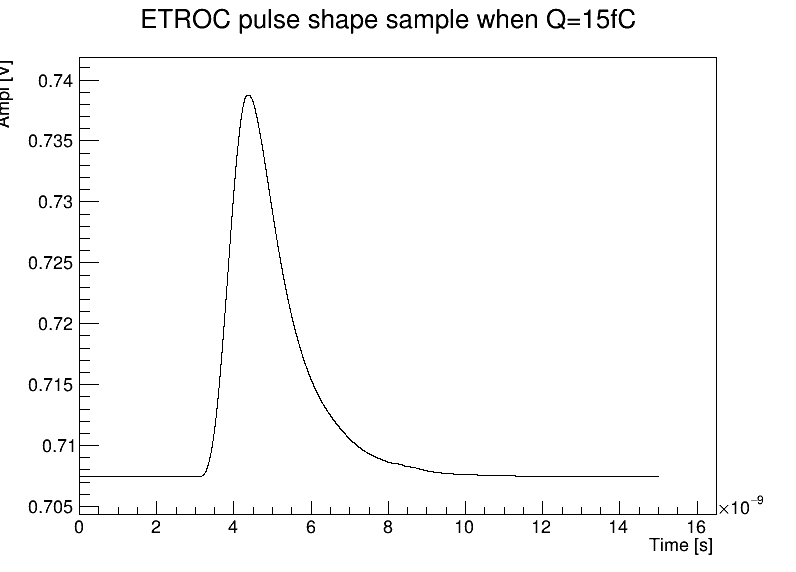

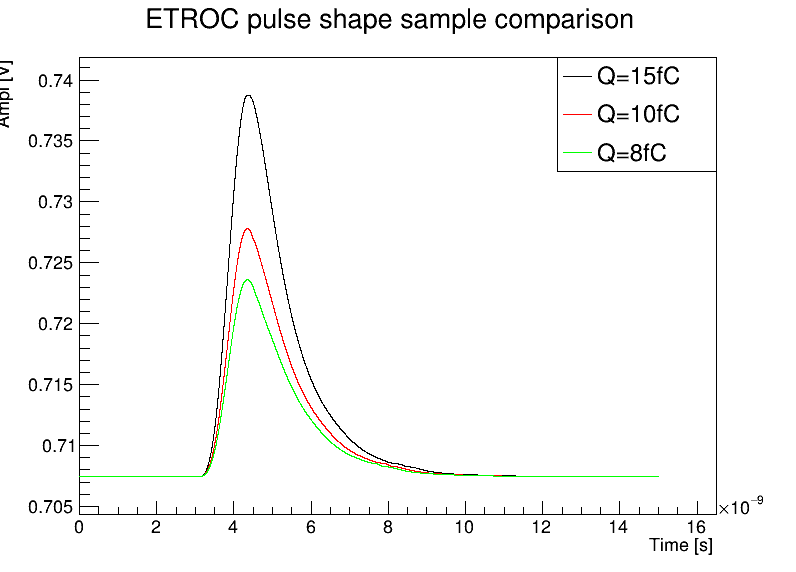

In [2]:
#Task 1

#reading the csv file and saving the data in a matrix 
def read_csv(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            data.append(list([float(val) for val in row]))
    return data


#passing data from the matrix to arrays and generating the graphs
pulses=read_csv('/Users/leonardolanteri/Desktop/ETROC2_PA_postSim_atHighPower-1.csv')
time = [row[0] for row in pulses]
ampl_8fC = [row[1] for row in pulses]
ampl_10fC = [row[3] for row in pulses]
ampl_15fC = [row[5] for row in pulses]

canvas_1 = root.TCanvas("canvas1", "Plot", 800, 600)
pulse_shape_8fC = root.TGraph(len(time),array('d', time),array('d', ampl_8fC))
pulse_shape_8fC.Draw("AP")
pulse_shape_8fC.SetTitle("ETROC pulse shape sample when Q=8fC")
pulse_shape_8fC.GetXaxis().SetTitle("Time [s]")
pulse_shape_8fC.GetYaxis().SetTitle("Ampl [V]")
canvas_1.Draw()

canvas_2 = root.TCanvas("canvas2", "Plot", 800, 600)
canvas_2.cd()
pulse_shape_10fC = root.TGraph(len(time),array('d', time),array('d', ampl_10fC))
pulse_shape_10fC.Draw("AP")
pulse_shape_10fC.SetTitle("ETROC pulse shape sample when Q=10fC")
pulse_shape_10fC.GetXaxis().SetTitle("Time [s]")
pulse_shape_10fC.GetYaxis().SetTitle("Ampl [V]")
canvas_2.Draw()

canvas_3 = root.TCanvas("canvas3", "Plot", 800, 600)
canvas_3.cd()
pulse_shape_15fC = root.TGraph(len(time),array('d', time),array('d', ampl_15fC))
pulse_shape_15fC.Draw("AP")
pulse_shape_15fC.SetTitle("ETROC pulse shape sample when Q=15fC")
pulse_shape_15fC.GetXaxis().SetTitle("Time [s]")
pulse_shape_15fC.GetYaxis().SetTitle("Ampl [V]")
canvas_3.Draw()

canvas_4 = root.TCanvas("canvas4", "Plot", 800, 600)
canvas_4.cd()
pulse_shape_15fC_bis = root.TGraph(len(time),array('d', time),array('d', ampl_15fC))
pulse_shape_15fC_bis.SetTitle("ETROC pulse shape sample comparison")
pulse_shape_15fC_bis.GetXaxis().SetTitle("Time [s]")
pulse_shape_15fC_bis.GetYaxis().SetTitle("Ampl [V]")
pulse_shape_15fC_bis.Draw("")
pulse_shape_10fC.SetLineColor(2)
pulse_shape_10fC.Draw("same")
pulse_shape_8fC.SetLineColor(3)
pulse_shape_8fC.Draw("same")
legend = root.TLegend(0.7,0.7,0.9,0.9)
legend.AddEntry(pulse_shape_15fC_bis,"Q=15fC","l")
legend.AddEntry(pulse_shape_10fC,"Q=10fC","l")
legend.AddEntry(pulse_shape_8fC,"Q=8fC","l")
legend.Draw("same")
canvas_4.Draw()

#for i in range(len(time)):
#    if ampl_8fC[i]>0.7075:
#        print(time[i])
#        print(ampl_8fC[i])


In [3]:
#Task 2 (part 1)

import uproot

#Opening a ROOT tree where the data is stored
root_file = root.TFile.Open("/Users/leonardolanteri/Desktop/run_2537_merged.root")
tree = root_file.Get("pulse")

#Creating variables to store the branch values
tot_code_list = []
toa_code_list = [] 
cal_code_list = []
row_list = []
col_list = []
tot_list = []
toa_list = []
LP2_20_list = []
clock_list = []
 
#Looping on the tree entries and calculating (and storing) toa and tot for all the events that featured 1 hit on ETROC (until having 10'000 clean events) 
for events in uproot.iterate("/Users/leonardolanteri/Desktop/run_2537_merged.root", step_size=1):
    if events.nhits==1:
        events['bin'] = 3.125 / np.maximum(events.cal_code, 1)
        events['toa'] = 12.5 - events.bin * events.toa_code
        events['tot'] = (2*events.tot_code - np.floor(events.tot_code/32))*events.bin
        tot_list.append(events.tot)
        toa_list.append(events.toa)
        tot_code_list.append(events.tot_code)
        toa_code_list.append(events.toa_code) 
        cal_code_list.append(events.cal_code)
        row_list.append(events.row)
        col_list.append(events.col)
        LP2_20_list.append(events.LP2_20)
        clock_list.append(events.Clock)
        if len(tot_list)%1000==0:
            print(len(tot_list))
        if len(tot_list)==10000:
            break


# Close the ROOT file
root_file.Close()


#for i in range(50):
    #print(row[i])



1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


352


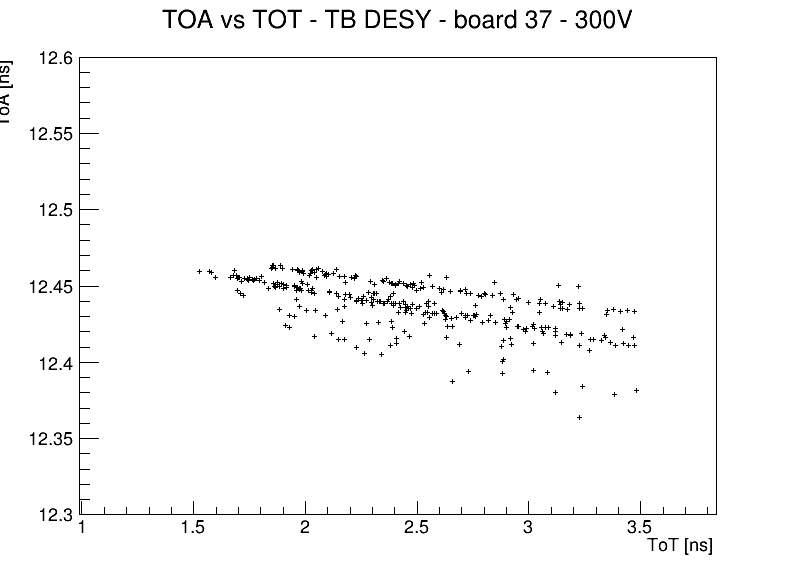

In [4]:
#Task 2 (part 2)


#Switching from lists (which behave weirdly) to arrays
tot_array, toa_array = array('f',[0]), array('f',[0])

for i in range(len(tot_list)):
    if toa_list[i][0][0]>12 and tot_list[i][0][0]<3.5:
        tot_array.append(tot_list[i][0][0])
        toa_array.append(toa_list[i][0][0])
        #print(cal_code_list[i][0][0])

print(len(toa_array))
#Creating the graph toa vs tot
canvas_5 = root.TCanvas("canvas5", "Plot", 800, 600)
toa_vs_tot = root.TGraph(len(tot_array),array('f', tot_array),array('f', toa_array))
toa_vs_tot.Draw("AP")
toa_vs_tot.SetTitle("TOA vs TOT - TB DESY - board 37 - 300V")
toa_vs_tot.SetMarkerStyle(2)
toa_vs_tot.SetMarkerSize(0.5)
toa_vs_tot.GetXaxis().SetRangeUser(1,4)
toa_vs_tot.GetYaxis().SetRangeUser(12.3,12.6)
toa_vs_tot.GetXaxis().SetTitle("ToT [ns]")
toa_vs_tot.GetYaxis().SetTitle("ToA [ns]")
canvas_5.Draw()



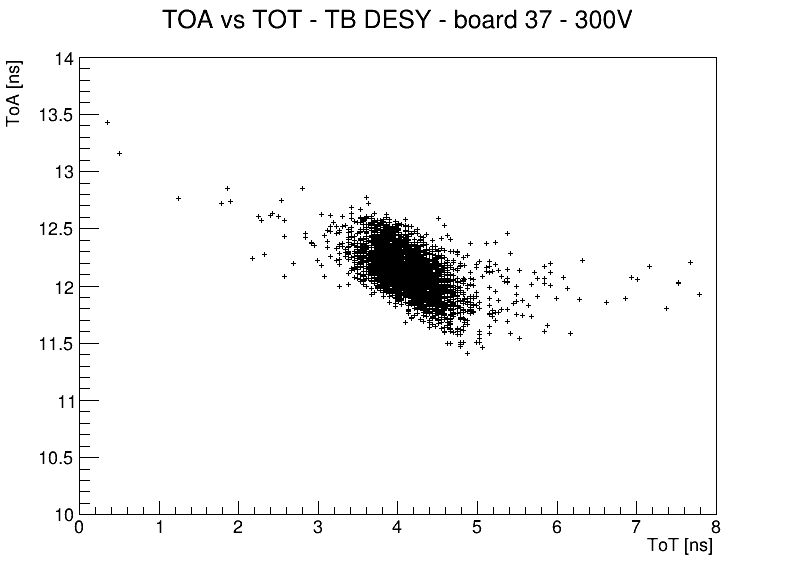

In [5]:
#Task 2 (part 2 bis)


#Switching from lists (which behave weirdly) to arrays
tot_array, toa_array = array('f',[0]), array('f',[0])
cal_code_sum = 0
canvas_5bis = root.TCanvas("canvas5bis", "Plot", 800, 600)
cal_code_hist = root.TH1F("cal_code_hist", "Histogram of Calibration code values", 100, 100, 200)
good_events = 0

for i in range(len(tot_list)):
    #cal_code_hist.Fill(cal_code_list[i][0][0])
    if cal_code_list[i][0][0]<200:
        cal_code_sum += cal_code_list[i][0][0]
        good_events += 1
 
cal_code_avg = cal_code_sum/good_events

for j in range(len(tot_list)):
    if row_list[j][0][0]>4 and row_list[j][0][0] <12 and col_list[j][0][0]>4 and col_list[j][0][0] <12:
        bin = 3.125 / cal_code_avg
        #bin = 3.125/cal_code_list[i][0][0]
        toa = 12.5 - bin * toa_code_list[j][0][0] - LP2_20_list[j][0][1]*10e8+clock_list[j][0]
        #print(clock_list[j])
        tot = (2*tot_code_list[j][0][0] - np.floor(tot_code_list[j][0][0]/32))*bin
        tot_array.append(tot)
        toa_array.append(toa)
        #print("tot1")
        #print(tot_list[j][0][0])
        #print("tot2")
        #print(toa)
        #print(tot)




#print(good_events)
#print(cal_code_avg)  
#cal_code_hist.Draw("hist")
#print(len(toa_array))
    
toa_vs_tot_bis = root.TGraph(len(tot_array),array('f', tot_array),array('f', toa_array))
toa_vs_tot_bis.Draw("AP")
toa_vs_tot_bis.SetTitle("TOA vs TOT - TB DESY - board 37 - 300V")
toa_vs_tot_bis.SetMarkerStyle(2)
toa_vs_tot_bis.SetMarkerSize(0.5)
toa_vs_tot_bis.GetXaxis().SetRangeUser(0,8)
toa_vs_tot_bis.GetYaxis().SetRangeUser(10,14)
toa_vs_tot_bis.GetXaxis().SetTitle("ToT [ns]")
toa_vs_tot_bis.GetYaxis().SetTitle("ToA [ns]")
canvas_5bis.Draw()


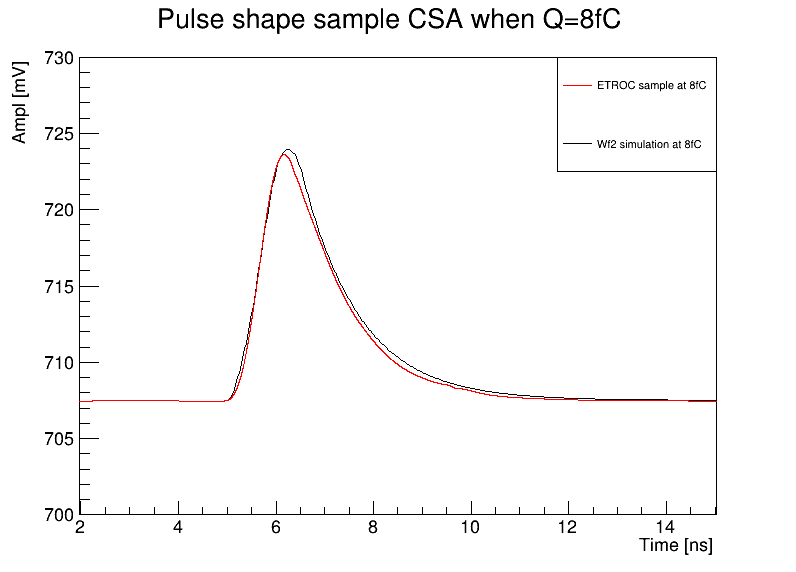

In [6]:
#Task 3.a compare 8fC on wf2 with 8fC ETROC pre-ampl
import re

with open('/Users/leonardolanteri/Desktop/Weightfield6.0/8fC_BV220_DV10_W1_H55_SP1300_SW1300_G16.9_T300_A0_D0_BW2_C3.2_L1_GS0.1_BBBW0.7_MIPU65_1.txt', 'r') as fileCSA_8:
    # Skip the first two lines (assuming they are headers)
    next(fileCSA_8)
    next(fileCSA_8)
    next(fileCSA_8)
    next(fileCSA_8)
    
    # Initialize a list to store the data
    dataCSA_8 = []
    
    # Read the remaining lines
    for line in fileCSA_8:
        # Split the line by four spaces
        values = re.split(r'\s{3,}', line.strip())
        values = [float(value) if value else float('nan') for value in values]
        # Append the values to the data list
        dataCSA_8.append(values)

# Print the data to verify

time_CSA_8 = [row[0] for row in dataCSA_8]
ampl_CSA_8 = [(-row[7]+707.5) for row in dataCSA_8]

ampl_8fC_rescaled = [0]*len(time)
time_rescaled=[0]*len(time)

for i in range(len(time)):
    ampl_8fC_rescaled[i]=ampl_8fC[i]*1000
    time_rescaled[i]=time[i]*10e8+1.82

canvas_CSA8 = root.TCanvas("canvas_CSA8", "Plot", 800, 600)
pulse_CSA8 = root.TGraph(len(time_CSA_8),array('f', time_CSA_8),array('f', ampl_CSA_8))
pulse_8fC_rescaled = root.TGraph(len(time),array('f', time_rescaled),array('f', ampl_8fC_rescaled))
pulse_CSA8.Draw("APc")
pulse_CSA8.SetTitle("Pulse shape sample CSA when Q=8fC")
pulse_CSA8.GetXaxis().SetTitle("Time [ns]")
pulse_CSA8.GetXaxis().SetRangeUser(0,15)
pulse_CSA8.GetYaxis().SetRangeUser(700,730)
pulse_CSA8.GetYaxis().SetTitle("Ampl [mV]")
pulse_8fC_rescaled.Draw("same")
pulse_8fC_rescaled.SetLineColor(2)
legend2 = root.TLegend(0.7,0.7,0.9,0.9)
legend2.AddEntry(pulse_8fC_rescaled,"ETROC sample at 8fC","l")
legend2.AddEntry(pulse_CSA8,"Wf2 simulation at 8fC","l")
legend2.Draw("same")
canvas_CSA8.Draw()





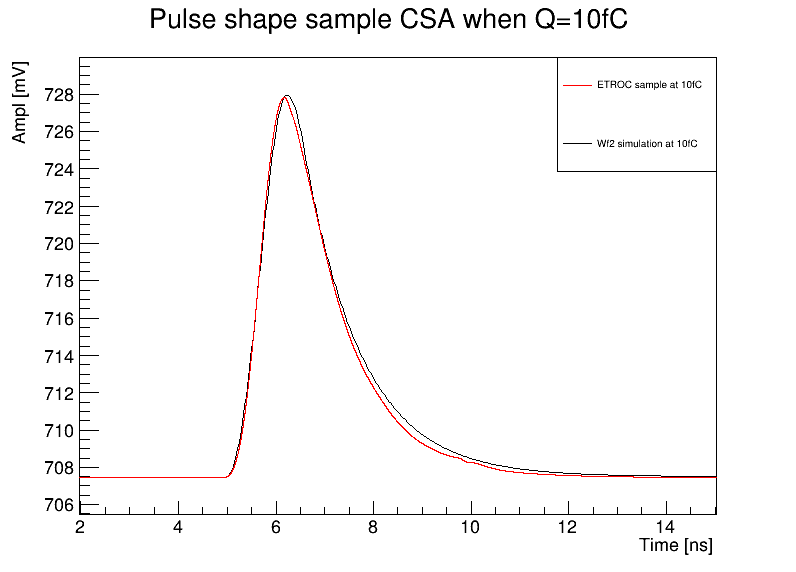

In [7]:
#Task 3.b compare 10fC on wf2 with 10fC ETROC pre-ampl
import re

with open('/Users/leonardolanteri/Desktop/Weightfield6.0/10fC_BV220_DV10_W1_H55_SP1300_SW1300_G21_T300_A0_D0_BW2_C3.2_L1_GS0.1_BBBW0.7_MIPU65_1.txt', 'r') as fileCSA_10:
    # Skip the first two lines (assuming they are headers)
    next(fileCSA_10)
    next(fileCSA_10)
    next(fileCSA_10)
    next(fileCSA_10)
    
    # Initialize a list to store the data
    dataCSA_10 = []
    
    # Read the remaining lines
    for line in fileCSA_10:
        # Split the line by four spaces
        values = re.split(r'\s{3,}', line.strip())
        values = [float(value) if value else float('nan') for value in values]
        # Append the values to the data list
        dataCSA_10.append(values)

# Print the data to verify

time_CSA_10 = [row[0] for row in dataCSA_10]
ampl_CSA_10 = [(-row[7]+707.5) for row in dataCSA_10]

ampl_10fC_rescaled = [0]*len(time)
time_rescaled=[0]*len(time)

for i in range(len(time)):
    ampl_10fC_rescaled[i]=ampl_10fC[i]*1000
    time_rescaled[i]=time[i]*10e8+1.82

canvas_CSA10 = root.TCanvas("canvas_CSA10", "Plot", 800, 600)
pulse_CSA10 = root.TGraph(len(time_CSA_8),array('f', time_CSA_10),array('f', ampl_CSA_10))
pulse_10fC_rescaled = root.TGraph(len(time),array('f', time_rescaled),array('f', ampl_10fC_rescaled))
pulse_CSA10.Draw("APc")
pulse_CSA10.SetTitle("Pulse shape sample CSA when Q=10fC")
legend3 = root.TLegend(0.7,0.7,0.9,0.9)
legend3.AddEntry(pulse_10fC_rescaled,"ETROC sample at 10fC","l")
legend3.AddEntry(pulse_CSA10,"Wf2 simulation at 10fC","l")
legend3.Draw("same")
pulse_CSA10.GetXaxis().SetTitle("Time [ns]")
pulse_CSA10.GetXaxis().SetRangeUser(0,15)
pulse_CSA10.GetYaxis().SetTitle("Ampl [mV]")
pulse_10fC_rescaled.Draw("same")
pulse_10fC_rescaled.SetLineColor(2)
canvas_CSA10.Draw()

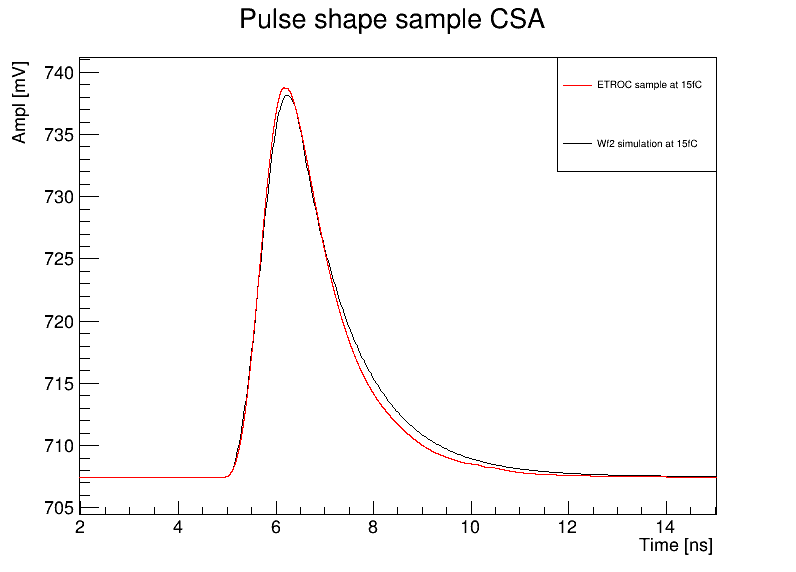

In [8]:
#Task 3.c compare 15fC on wf2 with 15fC ETROC pre-ampl
import re

with open('/Users/leonardolanteri/Desktop/Weightfield6.0/15fC_BV220_DV10_W1_H55_SP1300_SW1300_G31.5_T300_A0_D0_BW2_C3.2_L1_GS0.1_BBBW0.7_MIPU65_1.txt', 'r') as fileCSA_15:
    # Skip the first two lines (assuming they are headers)
    next(fileCSA_15)
    next(fileCSA_15)
    next(fileCSA_15)
    next(fileCSA_15)
    
    # Initialize a list to store the data
    dataCSA_15 = []
    
    # Read the remaining lines
    for line in fileCSA_15:
        # Split the line by four spaces
        values = re.split(r'\s{3,}', line.strip())
        values = [float(value) if value else float('nan') for value in values]
        # Append the values to the data list
        dataCSA_15.append(values)

# Print the data to verify

time_CSA_15 = [row[0] for row in dataCSA_15]
ampl_CSA_15 = [(-row[7]+707.5) for row in dataCSA_15]

ampl_15fC_rescaled = [0]*len(time)
time_rescaled=[0]*len(time)

for i in range(len(time)):
    ampl_15fC_rescaled[i]=ampl_15fC[i]*1000
    time_rescaled[i]=time[i]*10e8+1.82

canvas_CSA15 = root.TCanvas("canvas_CSA15", "Plot", 800, 600)
pulse_CSA15 = root.TGraph(len(time_CSA_15),array('f', time_CSA_15),array('f', ampl_CSA_15))
pulse_15fC_rescaled = root.TGraph(len(time),array('f', time_rescaled),array('f', ampl_15fC_rescaled))
pulse_CSA15.Draw("APc")
pulse_CSA15.SetTitle("Pulse shape sample CSA")
pulse_CSA15.GetXaxis().SetTitle("Time [ns]")
pulse_CSA15.GetXaxis().SetRangeUser(0,15)
pulse_CSA15.GetYaxis().SetTitle("Ampl [mV]")
pulse_15fC_rescaled.Draw("same")
pulse_15fC_rescaled.SetLineColor(2)
legend4 = root.TLegend(0.7,0.7,0.9,0.9)
legend4.AddEntry(pulse_15fC_rescaled,"ETROC sample at 15fC","l")
legend4.AddEntry(pulse_CSA15,"Wf2 simulation at 15fC","l")
legend4.Draw("same")
canvas_CSA15.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_pulses
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_charges
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_tottoa
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_comparison
Warning in <TROOT::Append>: Replacing existing TH1: charge_hist (Potential memory leak).


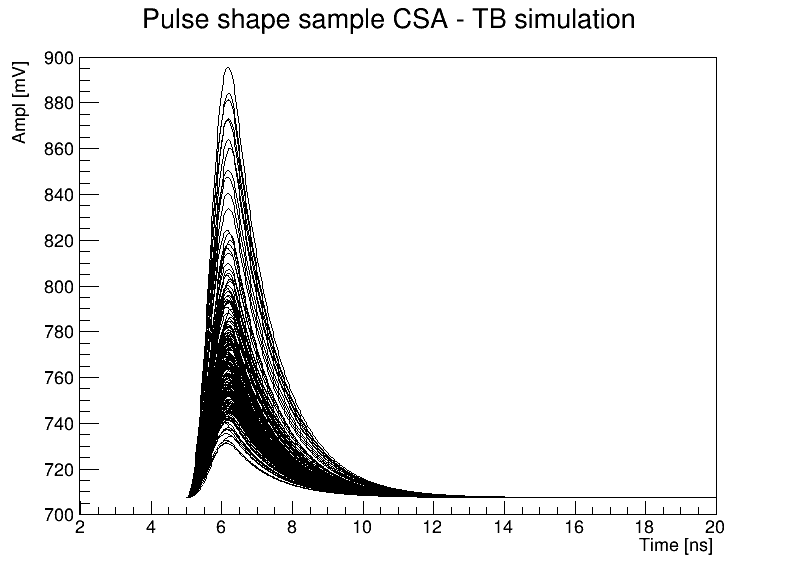

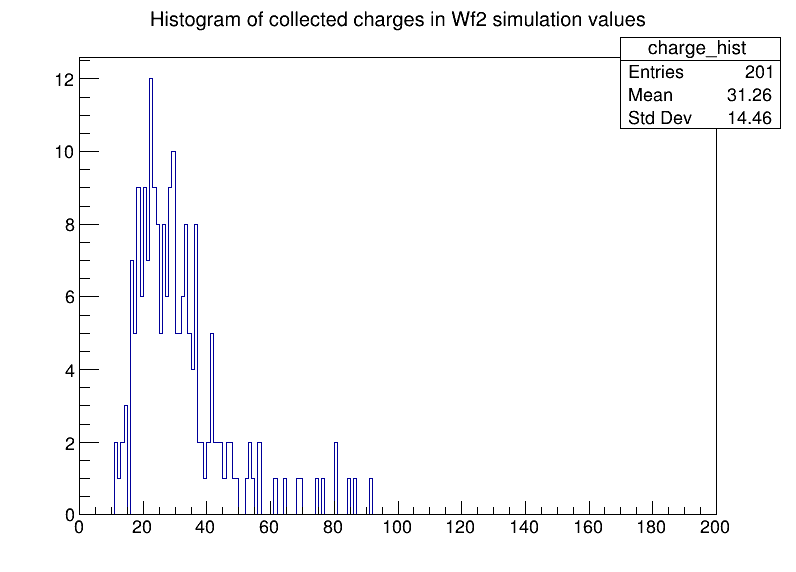

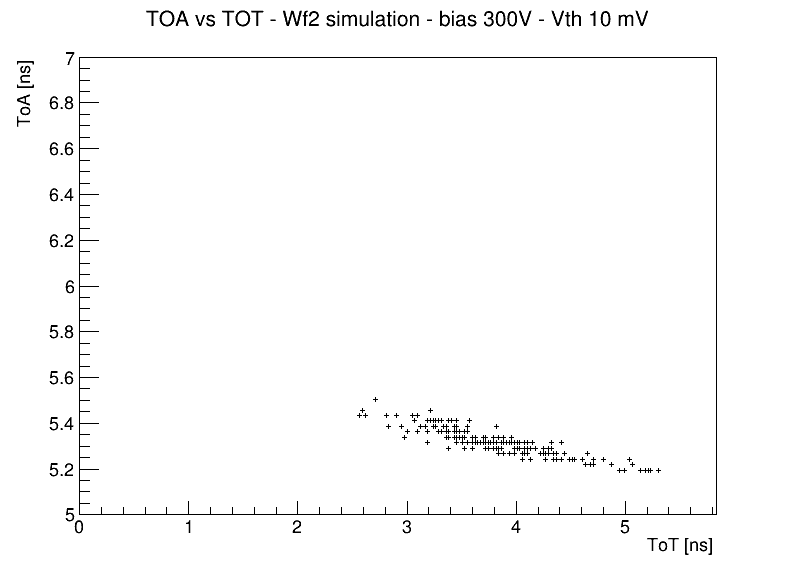

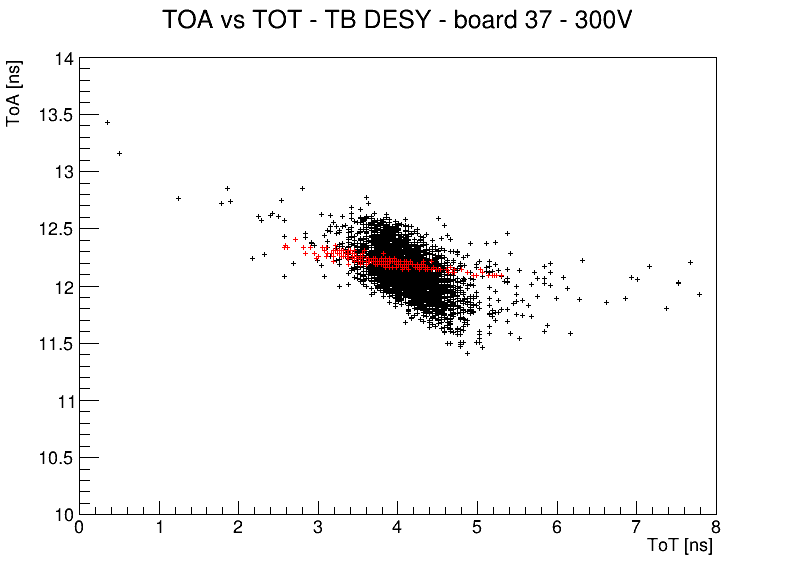

In [12]:
import os

#specify the path to your folder containing the text files
folder_path = '/Users/leonardolanteri/Desktop/ToA_ToT_studies/pulses_300V_ETROC'

canvas_pulses = root.TCanvas("canvas_pulses", "Plot", 800, 600)
canvas_charges = root.TCanvas("canvas_charges", "Plot", 800, 600)
canvas_tottoa = root.TCanvas("canvas_tottoa", "Plot", 800, 600)
canvas_comparison = root.TCanvas("canvas_comparison", "Plot", 800, 600)
charge_hist = root.TH1F("charge_hist", "Histogram of collected charges in Wf2 simulation values", 200, 0, 200)

signalnoise=False
thresholdnoise=False

#iterate over each file in the folder
#file counter 
i=0
#element counter
j=0
#other useful arrays
pulse_CSA = []
tot_CSA_array, toa_CSA_array, toa_CSA_array_rescaled, Q_CSA_array = array('f',[0]), array('f',[0]), array('f',[0]), array('f', [0])
tut_CSA_list = [0]*202
Vth = 713

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        i+=1
        with open(file_path, 'r') as filein:
        #skip the first two lines (headers)
            next(filein)
            next(filein)
            next(filein)
            next(filein)
            
            datain = []
    
            #read the lines
            for linein in filein:
                #split the line by three or four spaces
                valuesin = re.split(r'\s{3,}', linein.strip())
                valuesin = [float(valuein) if valuein else float('nan') for valuein in valuesin]
                #append the values to the data list
                datain.append(valuesin)


            #saving pulses in arrays and creating histograms
            time_CSAin = [rowin[0] for rowin in datain]
            ampl_CSAin = [(-rowin[7]+707.5) for rowin in datain]

            if signalnoise:
                noise = np.random.normal(0,1,size=1251)
                ampl_CSAin += noise

            #creating an array of the collected charges
            for rowin in datain:
                if rowin[0]>10 and rowin[0]<10.02:
                    Q_CSA_array.append(rowin[8])
                    charge_hist.Fill(rowin[8])

            if thresholdnoise:
                noisevth = np.random.normal(0,1,size=1)
                Vth += noisevth[0]


            for k in range(len(time_CSAin)):
                if ampl_CSAin[k]>Vth:
                    toa_CSA_array.append(time_CSAin[k+1])
                    break

            for l in range(len(time_CSAin)):
                if ampl_CSAin[l]>Vth:
                    tut_CSA_list[i]=time_CSAin[l+1]

            if i==1:
                canvas_pulses.cd()
                pulse_CSA.append(root.TGraph(len(time_CSAin),array('f', time_CSAin),array('f', ampl_CSAin)))
                pulse_CSA[i-1].Draw("APc")
                pulse_CSA[i-1].SetTitle("Pulse shape sample CSA - TB simulation")
                pulse_CSA[i-1].GetXaxis().SetTitle("Time [ns]")
                pulse_CSA[i-1].GetXaxis().SetRangeUser(0,20)
                pulse_CSA[i-1].GetYaxis().SetTitle("Ampl [mV]")
                pulse_CSA[i-1].GetYaxis().SetRangeUser(700,900)

            else:
                canvas_pulses.cd()
                pulse_CSA.append(root.TGraph(len(time_CSAin),array('f', time_CSAin),array('f', ampl_CSAin)))
                pulse_CSA[i-1].Draw("same")
                
            
canvas_pulses.Draw()

canvas_charges.cd()
charge_hist.Draw("hist")
canvas_charges.Draw()

for m in range (len(tut_CSA_list)):
    if m==0:
        pass
    else:
        tot_CSA_array.append(tut_CSA_list[m]-toa_CSA_array[m])
        toa_CSA_array_rescaled.append(toa_CSA_array[m]+6.9)

canvas_tottoa.cd()
toa_vs_tot_CSA = root.TGraph(len(tot_CSA_array),array('f', tot_CSA_array),array('f', toa_CSA_array))
toa_vs_tot_CSA.Draw("AP")
toa_vs_tot_CSA.SetTitle("TOA vs TOT - Wf2 simulation - bias 300V - Vth 10 mV")
toa_vs_tot_CSA.SetMarkerStyle(2)
toa_vs_tot_CSA.SetMarkerSize(0.5)
#toa_vs_tot_CSA.GetXaxis().SetRangeUser(4,7)
toa_vs_tot_CSA.GetYaxis().SetRangeUser(5,7)
toa_vs_tot_CSA.GetXaxis().SetTitle("ToT [ns]")
toa_vs_tot_CSA.GetYaxis().SetTitle("ToA [ns]")
toa_vs_tot_CSA.Draw("AP")
canvas_tottoa.Draw()
#print(len(tot_CSA_array))
#print((tot_CSA_array))

toa_vs_tot_CSA_comparison = root.TGraph(len(tot_CSA_array),array('f', tot_CSA_array),array('f', toa_CSA_array_rescaled))
canvas_comparison.cd()
toa_vs_tot_bis.Draw("ap")
toa_vs_tot_CSA_comparison.Draw("Psame")
toa_vs_tot_CSA_comparison.SetMarkerColor(2)
toa_vs_tot_CSA_comparison.SetMarkerStyle(2)
toa_vs_tot_CSA_comparison.SetMarkerSize(0.5)
canvas_comparison.Draw()